# Taxi Demand Prediction

In [100]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import common
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import clustering
import plotting

## Loading Data

In [97]:
n_rows = 100000
df = common.load_data(nrows=n_rows)

Executing: load_data
With Args: None
With Kwargs: 
	nrows : 100000
Result: <class 'pandas.core.frame.DataFrame'>
Execution Duration: 0.344249010086 seconds



## Seaborn Properties

In [101]:
sns.set_context("poster", font_scale=1.5)

## NYC Station Partitioning
### Finding clusters using KMeans

In [102]:
n_clusters = 200
pickup_cls = clustering.cluster_pickups(df, n_clusters=n_clusters)
dropoff_cls = clustering.cluster_dropoffs(df, n_clusters=n_clusters)

### Plotting clusters

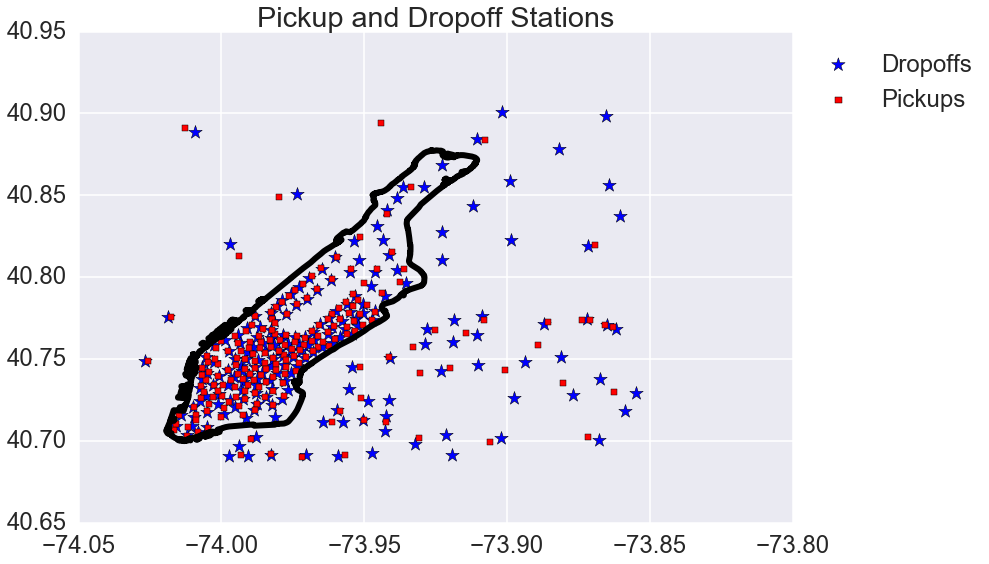

In [161]:
fig, ax = plt.subplots(1, 1)
plotting.plot_manhattan(ax)
ax.scatter(
    dropoff_cls.cluster_centers_[:, 0],
    dropoff_cls.cluster_centers_[:, 1],
    marker="*", s=200, c="b", label="Dropoffs")
ax.scatter(
    pickup_cls.cluster_centers_[:, 0],
    pickup_cls.cluster_centers_[:, 1],
    marker="s", s=40, c="r", label="Pickups")
ax.legend(bbox_to_anchor=(1, 1), loc=2)
ax.set_title("Pickup and Dropoff Stations")

## Determining Pickup -- Dropoff Probabilities
### Finding pickup to dropoff station frequencies

In [158]:
import tqdm
freqs = np.zeros((n_clusters, n_clusters))
for i, row in tqdm.tqdm(df.iterrows(), total=n_rows, leave=True):
    pickup = np.array([row["pickup_longitude"],
                       row["pickup_latitude"]])
    dropoff = np.array([row["dropoff_longitude"],
                        row["dropoff_latitude"]])
    p_label = pickup_cls.predict(pickup)[0]
    d_label = dropoff_cls.predict(dropoff)[0]
    freqs[p_label][d_label] += 1

100%|██████████| 100000/100000 [01:13<00:00, 1360.43it/s]


### Determining the pairwise probabilities

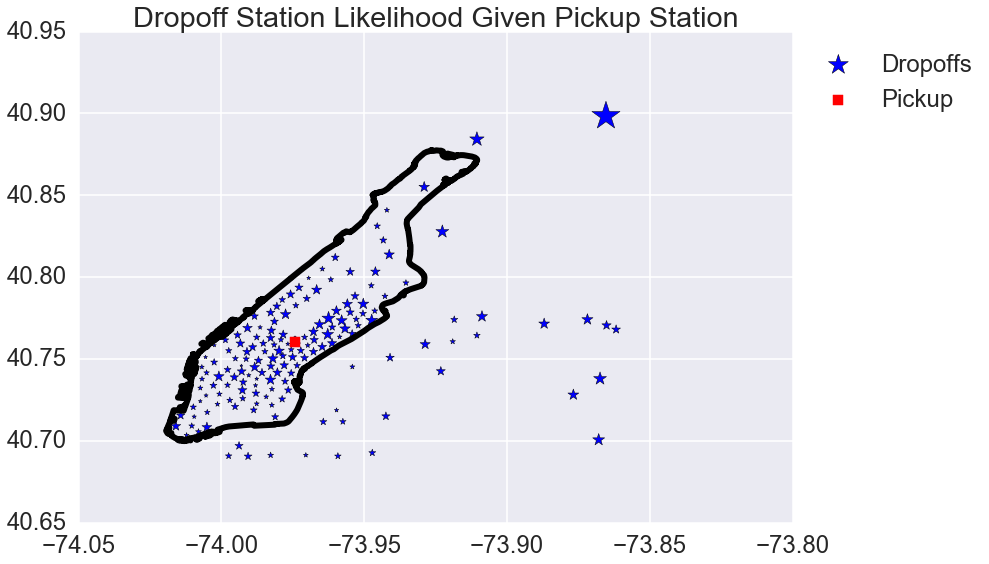

In [171]:
probs = freqs / freqs.sum(axis=0)
interest = 5
fig, ax = plt.subplots(1, 1)
plotting.plot_manhattan(ax)
sizes = probs[interest] * 7000
ax.scatter(
    dropoff_cls.cluster_centers_[:, 0], 
    dropoff_cls.cluster_centers_[:, 1],
    s=sizes, marker="*", label="Dropoffs")
ax.scatter(
    pickup_cls.cluster_centers_[interest, 0],
    pickup_cls.cluster_centers_[interest, 1],
    marker="s", s=100, color="r", label="Pickup")
ax.legend(bbox_to_anchor=(1, 1), loc=2)
ax.set_title("Dropoff Station Likelihood Given Pickup Station")

## Saving Data

In [187]:
np.savetxt("/home/wallar/www/taxi-vis/probs.csv", probs, delimiter=",",
           header=",".join(str(i) for i in xrange(200)), comments="")
np.savetxt("/home/wallar/www/taxi-vis/pickup_stations.csv", pickup_cls.cluster_centers_, delimiter=",",
           header="lng,lat", comments="")
np.savetxt("/home/wallar/www/taxi-vis/dropoff_stations.csv", dropoff_cls.cluster_centers_, delimiter=",",
           header="lng,lat", comments="")